# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** Wei JIANG, Minghui SHI, Costanza VOLPINI \
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
from sklearn import naive_bayes

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

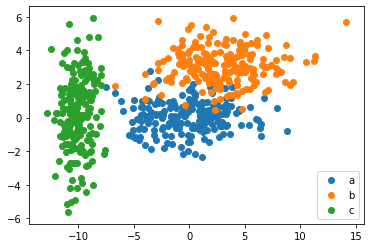

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline
from numpy.linalg import inv
import numpy as np

# Show clusters
plt.scatter(a[:, 0], a[:, 1],label='a')
plt.scatter(b[:, 0], b[:, 1],label='b')
plt.scatter(c[:, 0], c[:, 1],label='c')
plt.legend()

Firstly, we want to identify the type of distribution, from the above scatter we expect normal distributions. Let's analyze each distribution histogram.

Histogram a


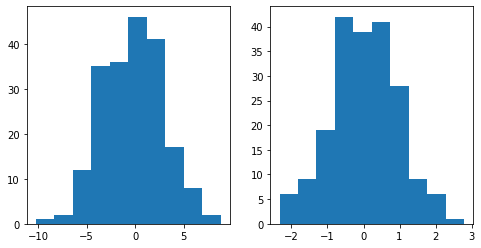

In [4]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].hist(a[:, 0])
axes[1].hist(a[:, 1])
print("Histogram a")

Histogram b


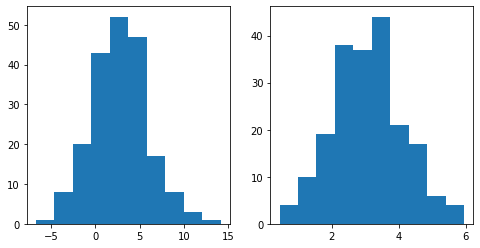

In [5]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].hist(b[:, 0])
axes[1].hist(b[:, 1])
print("Histogram b")

Histogram c


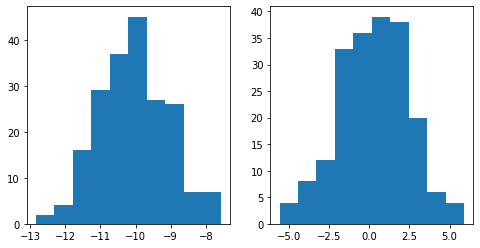

In [6]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].hist(c[:, 0])
axes[1].hist(c[:, 1])
print("Histogram c")

From the above histograms, we can plausibly assume that our distributions follow a Normal Gaussian distribution. The Bayesian classification works very well with Gaussian distribution; therefore, we are expecting sharp decision curves.

The Bayesian classification (maximum a posteriori) is defined as: 
$$p(x|w_1)P(w_1) <^?> p(x|w_2)P(w_2)$$
The prior probability for each class can be easily detected, and it will be the same for all of them since the three datasets have the same size. 
$$P(a) = P(b) = P(c)$$
Let's call the prior probability $P(w)$. Therefore:
$$P(w) = \frac{1}{3}$$

In [7]:
# prior probabilities for class a, b, c
P_w = np.array([a.shape[0], b.shape[0], c.shape[0]])/np.concatenate((a,b,c),0).shape[0]

We are now particularly interested in the covariance matrix since, as we have seen in the lectures, the are some special cases that could be applied that will simplify our discriminant functions and decision curves. \
Let's define our covariance matrix ($\Sigma_i$) of size $l \times l$:
$$\Sigma_i = E[(x - \mu_i)(x-\mu_i)^T] \; \textrm{where} \; \mu_i \; \textrm{is the mean of class} \; w_i$$
Below you can find the mean and covariance of the distributions. We are rounded the values to simplify.

In [8]:
# find mean
mean_a = np.mean(a, axis=0)
mean_b = np.mean(b, axis=0)
mean_c = np.mean(c, axis=0)
print("Mean a: ", mean_a.round(), " , mean b: ", mean_b.round(), " , mean c: ", mean_c.round())

# find covariance
covariance_a = np.cov(a.T)
covariance_b = np.cov(b.T)
covariance_c = np.cov(c.T)
print("Covariance a: ", covariance_a.round(), "\nCovariance b: ", covariance_b.round(), "\nCovariance c: ", covariance_c.round())

print(covariance_b)

Mean a:  [-0.  0.]  , mean b:  [3. 3.]  , mean c:  [-10.   0.]
Covariance a:  [[10.  0.]
 [ 0.  1.]] 
Covariance b:  [[10.  0.]
 [ 0.  1.]] 
Covariance c:  [[1. 0.]
 [0. 5.]]
[[10.17034812  0.18023771]
 [ 0.18023771  1.0840038 ]]


Let's write the discriminant function between class $b$ and $c$ and between class $c$ and $a$.
$$g_i(x) = -\frac{1}{2} x^T \Sigma_i^{-1}x + \frac{1}{2} x^T \Sigma_i^{-1}\mu_i - \frac{1}{2}\mu_i^T\Sigma_i^{-1}\mu_i + \frac{1}{2}\mu_i^T \Sigma_i^{-1}x + \ln P(w_i) + c_i$$
with $c_i = - \ln(\sqrt{2\pi |\Sigma|})$
TODO: check c_i

This refers to function ``discriminant_fn(x, cov, mean, P_w)``.

We have noticed that class $a$ and class $b$ have the same identical covariance matrix.
$$\Sigma_a = \Sigma_b$$
The discriminant function between class $a$ and $b$ can be written as: 
$$g_i(x) = w_i^Tx + w_{i0} \; \textrm{with} \; w_i = \Sigma^{-1}\mu_i \; \textrm{and} \; w_{i0} = \ln P(w_i) - \frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i$$
The discriminant functions are linear and the decision curves hyperplanes.

This refers to function ``discriminant_fn_same_cov(x, cov, mean, P_w)``.

In [9]:
# Discriminant fns
def discriminant_fn(x, cov, mean, P_w):
    return ((-1/2) * x.T @ inv(cov) @ x) + ((1/2) * x.T @ inv(cov) @ mean) - ((1/2) * mean.T @ inv(cov) @ mean) + \
            ((1/2) * mean.T @ inv(cov) @ x) + np.log(P_w) - np.log((2 * np.pi * np.linalg.det(cov))**0.5)
    
def discriminant_fn_same_cov(x, cov, mean, P_w):
    w_i = inv(cov) @ mean
    w_i0 = np.log(P_w) - ((1/2) * mean.T @ inv(cov) @ mean)
    return w_i.T @ x + w_i0

# between a and b discriminant_fn_same_cov
# between b and c discriminant_fn
# between c and a discriminant_fn

data = np.concatenate((a,b,c), 0).T
max_x = np.max(data[0])
min_x = np.min(data[0])
max_y = np.max(data[1])
min_y = np.min(data[1])

Code to plot discriminant curves.

In [10]:
N = 100 # Number of points in grid
xs, ys = np.meshgrid(np.linspace(min_x, max_x, N), np.linspace(min_y, max_y, N)) #TODO: bigger 300 x 300?
points = np.array([xs.ravel(), ys.ravel()]).T

AB = []
BC = []
CA = []
for x in points:
    ab = discriminant_fn_same_cov(x, covariance_a, mean_a, P_w[0])- discriminant_fn_same_cov(x, covariance_b, mean_b, P_w[1])
    bc = discriminant_fn(x, covariance_b, mean_b, P_w[1]) - discriminant_fn(x, covariance_c, mean_c, P_w[2])
    ca = discriminant_fn(x, covariance_c, mean_c, P_w[2]) - discriminant_fn(x, covariance_a, mean_a, P_w[0])
    
    AB.append(ab)
    BC.append(bc)
    CA.append(ca)
AB = np.array(AB)
BC = np.array(BC)
CA = np.array(CA)

thresh = 1e-5
AB[AB >= thresh] = 1
AB[AB < thresh] = 0
BC[BC >= thresh] = 1
BC[BC < thresh] = 0
CA[CA >= thresh] = 1
CA[CA < thresh] = 0

AB = AB.reshape(N,N)
BC = BC.reshape(N,N)
CA = CA.reshape(N,N)

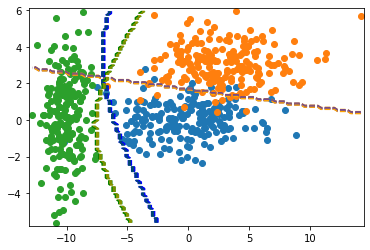

In [11]:
plt.contour(xs, ys, AB, linestyles='dashed', colors = ['orange','blue'])
plt.contour(xs, ys, BC, linestyles='dashed', colors = ['blue','green'])
plt.contour(xs, ys, CA, linestyles='dashed', colors = ['green','orange'])


plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])
plt.scatter(c[:,0],c[:,1])
plt.margins(0,0)

As we can see the 3 classes were well separated by the discriminant functions.

### Result from sklearn

We wanted to double-check our result with the one achieved using an external library as sklearn. We retain that we got a similar outcome with our classification.

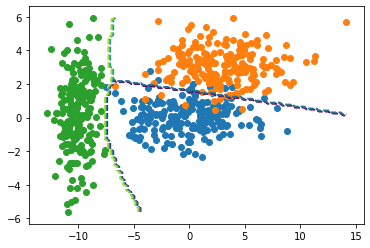

In [12]:
X = data.T
y = np.concatenate((np.ones(200), 2*np.ones(200), 3*np.ones(200)), axis=0)
clf = naive_bayes.GaussianNB()
clf.fit(X, y)
N = 100 # Number of points in grid
xs, ys = np.meshgrid(np.linspace(min_x, max_x, N), np.linspace(min_y, max_y, N)) #TODO: bigger 300 x 300?
points = np.array([xs.ravel(), ys.ravel()]).T
labels = clf.predict(points).reshape(N,N)
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])
plt.scatter(c[:,0],c[:,1])
plt.contour(xs, ys, labels, linestyles='dashed')
plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

Minimal distance classifier based on Mahalanobis distance is defined as:
$$d_m = \sqrt{(x - \mu_i) \Sigma^{-1} (x - \mu_i)}$$
From the definition we know that if $\Sigma$ is not diagonal the most probable class minimizes the Mahalanobis distance.
We expect a similar result to the one of "complete" Bayes classification since $d_m$ will just remove the constant, obtaining the discriminant function: $g_i(x) = -\frac{1}{2}(x- \mu_i)^T\Sigma_i^{-1}(x- \mu_i)$

In [13]:
def mahalanobis_dis(x, mean, cov):
    return np.sqrt((x - mean) @ inv(cov) @ (x- mean))

In [14]:
def classify_ab(x, mean_a, mean_b, cov_a,cov_b):
    distance = [mahalanobis_dis(x, mean_a, cov_a), mahalanobis_dis(x, mean_b, cov_b)]
    return np.argmin(distance)

Let's plot classes $a$ and $b$ classified using Mahalanobis distance.

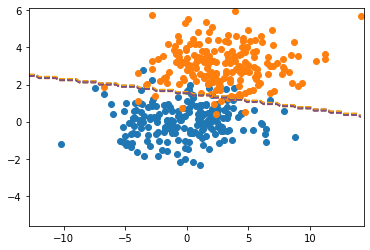

In [15]:
N = 100 # Number of points in grid
xs, ys = np.meshgrid(np.linspace(min_x, max_x, N), np.linspace(min_y, max_y, N)) #TODO: bigger 300 x 300?
points = np.array([xs.ravel(), ys.ravel()]).T

AB_m = []
for x in points:
    AB_m.append(classify_ab(x, mean_a, mean_b, covariance_a, covariance_b))
    
AB_m = np.array(AB_m).reshape(N,N)

plt.contour(xs, ys, AB_m, linestyles='dashed', colors = ['orange','blue'])
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])
plt.margins(0,0)

Let's plot classes $a$ and $b$ classified using Mahalanobis distance (green line) and the probability of each point based on Gaussian distribution belongs to each cluster (red line - computed before).

We have decided not to implement Euclidean distance as minimal distance classifier since our covariance matrixes are not of the form $\Sigma = \sigma^2I$. Using Euclidean distance will produce a lot of misclassified points.

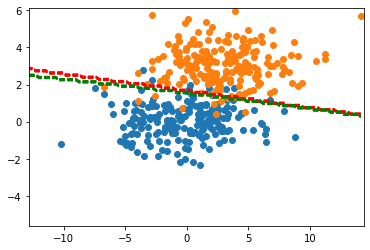

In [16]:
# superimpose: not matching because constants are ignored, refer to lecture slides 12 and 18
plt.contour(xs, ys, AB, linestyles='dashed', colors = ['red','red'])
plt.contour(xs, ys, AB_m, linestyles='dashed', colors = ['green','green'])
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])
plt.margins(0,0)

From the superimpose we can notice that the two lines are not matching due to the constant that is ignored in $d_m$.

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [17]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [18]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

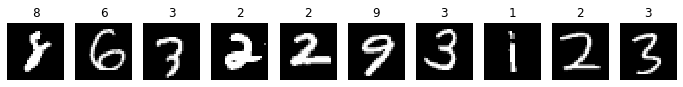

In [19]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*

We have used the Multi-layer Perceptron classifier of the library sklearn. MLP is a supervised learning algorithm.
Let's start declaring our model.

In [20]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100)

In [21]:
clf.hidden_layer_sizes

100

In [22]:
train_size = train_images.shape[0]
X_train = np.reshape(train_images, [train_size, 28*28])
y_train = train_labels

test_size = test_images.shape[0]
X_test = np.reshape(test_images, [test_size, 28*28])
y_test = test_labels

We now fit (train) our model. We have used the default loss provided by the library (log-loss function), and the default activation (ReLU). The default solver for weight optimization used was Adam.

In [23]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
print(clf.n_outputs_, clf.n_layers_)

10 3


After having trained our model we can predict labels for our test set. We got an accuracy of 96%.

In [25]:
preds = clf.predict(X_test)
diff = preds - test_labels
diff[diff != 0] = 1 
print("The test accuracy of 3 hidden layer MLP model is: ", 1 - np.sum(diff)/test_size)

The test accuracy of 3 hidden layer MLP model is:  0.9626
